In [2]:
source('../../source/basic.r')

source('../validataion.r')


Warning message:
“no function found corresponding to methods exports from ‘BSgenome’ for: ‘releaseName’”


In [3]:
suppressPackageStartupMessages({
    library(tidyverse)
    library(Signac)
    library(Seurat)
    library(GenomeInfoDb)
    library(EnsDb.Hsapiens.v86 )# hg38
   # library(EnsDb.Hsapiens.v75) #hg19
    library(ggplot2)
    library(patchwork)
    library(data.table)
    library(Matrix)
    set.seed(1234)
})

In [12]:
cpeaks <- fread('data/cpeak.bed')
bulkpeaks <- fread('data/peak_calling/all/all_peaks.narrowPeak.bed')%>%dplyr::select(V1:V3)
combinePeaks <- fread('data/peak_calling/merge/all_merge.bed')

In [31]:
a=cpeaks
b=bulkpeaks

In [32]:
#fun_map <- function(a,b){
    
    regions1 = a%>%as.data.frame%>%rename_with(~c('chr','start','end'))%>%
                                mutate(start=as.numeric(start), 
                                       end=as.numeric(end),
                                       id=row_number())
    regions2 = b%>%as.data.frame%>%rename_with(~c('chr','start','end'))%>%
                                mutate(start=as.numeric(start), 
                                       end=as.numeric(end),
                                       id=row_number())
    
    source('../../map_to_cPeak_v1/map_function2.r')
    res = fun_map_bed_customRef(regions1,regions2)
    res.df=res$df.trans%>%mutate(regions1=paste0(chr,'-',start_q,'-',end_q),
                     regions2=paste0(chr,'-',start,'-',end))%>%dplyr::select(regions1,regions2)
    
#    return(list(res.df=res.df, res=res))
#}

2.07882285118103



In [33]:
res%>%length

[1] 6

In [43]:
a%>%nrow

[1] 1568814

In [34]:
res.df%>%pull(regions1)%>%unique%>%length

[1] 474728

In [35]:
res.df%>%pull(regions2)%>%unique%>%length

[1] 363718

In [36]:
bulkpeaks%>%unique%>%nrow

[1] 379459

In [37]:
363718/379459

[1] 0.9585173

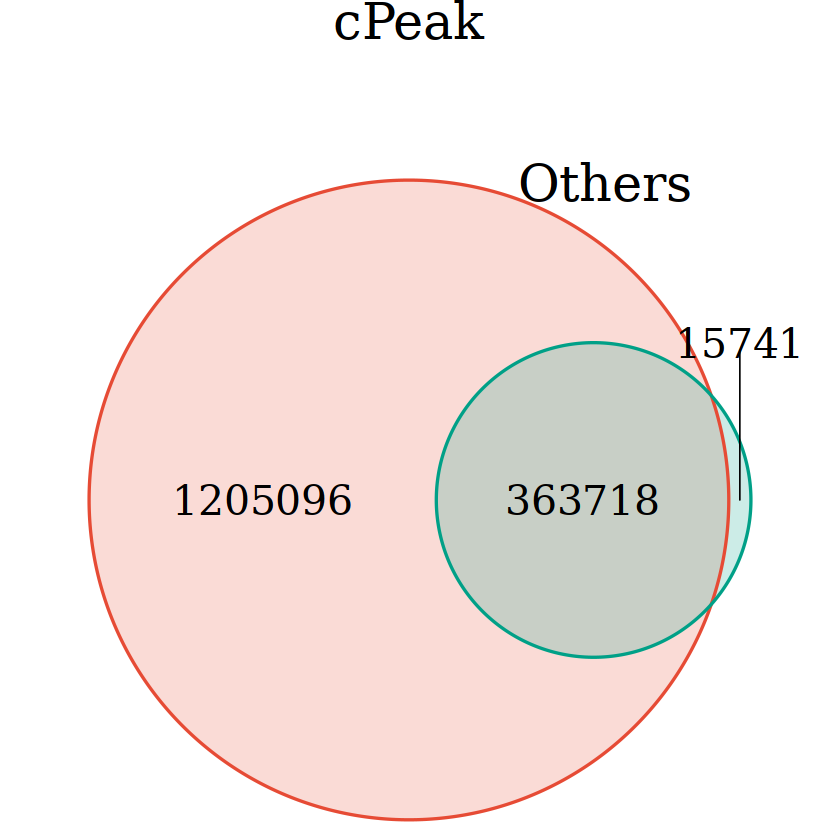

In [47]:
library(ggplot2)
library(VennDiagram)

# 创建韦恩图
venn.plot <- draw.pairwise.venn(
    
  area1 = 1568814,
  area2 = 379459,
  cross.area = 363718,
  category = c("cPeak", "Others"),
  cat.pos = c(0, 2),
 col= c(colors_[1],colors_[3]), 
 fill = c(colors_[1],colors_[3]),
  alpha = 0.2,
 # lty = 2,
  #label.col = "black",
  cex = 2,
 # fontfamily = "sans",
  cat.dist = 0.1,
  cat.default.pos = "outer",
    cat.cex = 2.5,
  margin = 0.01,
  scaled = TRUE
)

# # 转换为ggplot2对象
# p <- ggplotGrob(venn.plot)


In [24]:
a=cpeaks
b=combinePeaks

In [25]:
#fun_map <- function(a,b){
    
    regions1 = a%>%as.data.frame%>%rename_with(~c('chr','start','end'))%>%
                                mutate(start=as.numeric(start), 
                                       end=as.numeric(end),
                                       id=row_number())
    regions2 = b%>%as.data.frame%>%rename_with(~c('chr','start','end'))%>%
                                mutate(start=as.numeric(start), 
                                       end=as.numeric(end),
                                       id=row_number())
    
    source('../../map_to_cPeak_v1/map_function2.r')
    res = fun_map_bed_customRef(regions1,regions2)
    res.df=res$df.trans%>%mutate(regions1=paste0(chr,'-',start_q,'-',end_q),
                     regions2=paste0(chr,'-',start,'-',end))%>%dplyr::select(regions1,regions2)
    
#    return(list(res.df=res.df, res=res))
#}

7.17049527168274



In [26]:
res.df%>%pull(regions1)%>%unique%>%length

[1] 642316

In [27]:
res.df%>%pull(regions2)%>%unique%>%length

[1] 507619

In [29]:
combinePeaks%>%unique%>%nrow

[1] 564308

In [30]:
507619/564308

[1] 0.8995424

In [48]:
a=bulkpeaks
b=combinePeaks

In [49]:
#fun_map <- function(a,b){
    
    regions1 = a%>%as.data.frame%>%rename_with(~c('chr','start','end'))%>%
                                mutate(start=as.numeric(start), 
                                       end=as.numeric(end),
                                       id=row_number())
    regions2 = b%>%as.data.frame%>%rename_with(~c('chr','start','end'))%>%
                                mutate(start=as.numeric(start), 
                                       end=as.numeric(end),
                                       id=row_number())
    
    source('../../map_to_cPeak_v1/map_function2.r')
    res = fun_map_bed_customRef(regions1,regions2)
    res.df=res$df.trans%>%mutate(regions1=paste0(chr,'-',start_q,'-',end_q),
                     regions2=paste0(chr,'-',start,'-',end))%>%dplyr::select(regions1,regions2)
    
#    return(list(res.df=res.df, res=res))
#}

2.40172553062439



In [55]:
a%>%nrow

[1] 379459

In [56]:
b%>%nrow

[1] 564308

In [50]:
res.df%>%pull(regions1)%>%unique%>%length

[1] 375137

In [51]:
res.df%>%pull(regions2)%>%unique%>%length

[1] 369024

In [52]:
combinePeaks%>%unique%>%nrow

[1] 564308

In [58]:
375137/379459

[1] 0.9886101